### 第七章 数据清洗和准备

处理缺失数据

在许多数据分析工作中，缺失数据是经常发生的。pandas的目标之一就是尽量轻
松地处理缺失数据。例如，pandas对象的所有描述性统计默认都不包括缺失数
据。

In [ ]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan,
'avocado'])

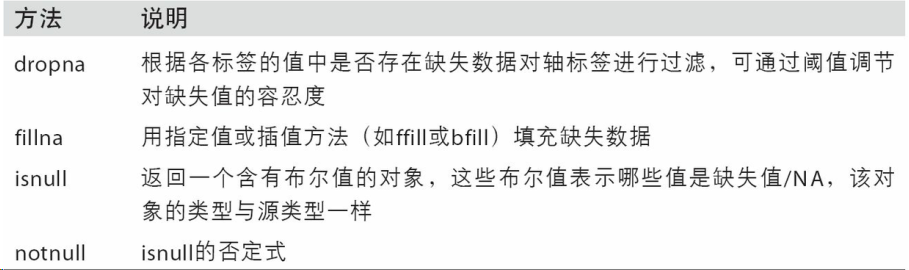

滤除缺失数据

过滤掉缺失数据的办法有很多种。你可以通过pandas.isnull或布尔索引的手工方
法，但dropna可能会更实用一些。对于一个Series，dropna返回一个仅含非空数
据和索引值的Series

In [ ]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

填充缺失数据

你可能不想滤除缺失数据（有可能会丢弃跟它有关的其他数据），而是希望通过其
他方式填补那些“空洞”。对于大多数情况而言，fillna方法是最主要的函数。通
过一个常数调用fillna就会将缺失值替换为那个常数值

In [ ]:
df.fillna(0)

In [ ]:
df.fillna({1: 0.5, 2: 0})

In [ ]:
_ = df.fillna(0, inplace=True)

In [ ]:
df = pd.DataFrame(np.random.randn(6, 3))

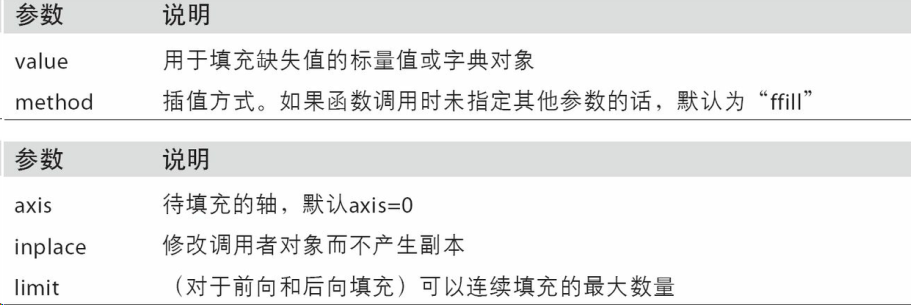

数据转换
<br>移除重复数据

In [ ]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'], 'k2': [1, 1, 2, 3, 3, 4, 4]})

In [ ]:
data.duplicated()

In [ ]:
data.drop_duplicates(['k1', 'k2'], keep='last')

利用函数或映射进行数据转换

对于许多数据集，你可能希望根据数组、Series或DataFrame列中的值来实现转换
工作。我们来看看下面这组有关肉类的数据：

In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork',
'bacon', 'Pastrami', 'corned beef',
'Bacon', 'pastrami', 'honey ham', 'novalox'], 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5,6]})

离散化和面元划分

为了便于分析，连续数据常常被离散化或拆分为“面元”（bin）。假设有一组人
员数据，而你希望将它们划分为不同的年龄组：

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
bins = [18, 25, 35, 60, 100]

In [ ]:
cats = pd.cut(ages, bins)

字符串操作

Python能够成为流行的数据处理语言，部分原因是其简单易用的字符串和文本处
理功能。大部分文本运算都直接做成了字符串对象的内置方法。对于更为复杂的模
式匹配和文本操作，则可能需要用到正则表达式。pandas对此进行了加强，它使
你能够对整组数据应用字符串表达式和正则表达式，而且能处理烦人的缺失数据。

#### 字符串对象方法

对于许多字符串处理和脚本应用，内置的字符串方法已经能够满足要求了。例如，
以逗号分隔的字符串可以用split拆分成数段：

### 数据规整：聚合、合并和重塑

层次化索引

层次化索引（hierarchical indexing）是pandas的一项重要功能，它使你能在一
个轴上拥有多个（两个以上）索引级别。抽象点说，它使你能以低维度形式处理高
维度数据。我们先来看一个简单的例子：创建一个Series，并用一个由列表或数组
组成的列表作为索引

In [ ]:
data = pd.Series(np.random.randn(9), index=[['a', 'a', 'a', 'b', 'b', 'c', 'c',
'd', 'd'], [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)), index=[['a', 'a', 'b', 'b'], [1, 2, 1,
2]], columns=[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])

重排与分级排序

有时，你需要重新调整某条轴上各级别的顺序，或根据指定级别上的值对数据进行
排序。swaplevel接受两个级别编号或名称，并返回一个互换了级别的新对象（但
数据不会发生变化）：

In [ ]:
frame.swaplevel('key1', 'key2')

根据级别汇总统计

许多对DataFrame和Series的描述和汇总统计都有一个level选项，它用于指定在
某条轴上求和的级别。再以上面那个DataFrame为例，我们可以根据行或列上的
级别来进行求和：

使用DataFrame的列进行索引

人们经常想要将DataFrame的一个或多个列当做行索引来用，或者可能希望将行
索引变成DataFrame的列。以下面这个DataFrame为例

In [ ]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1), 'c': ['one', 'one', 'one', 'two',
'two', 'two', 'two'], 'd': [0, 1, 2, 0, 1, 2, 3]})

合并数据集

pandas对象中的数据可以通过一些方式进行合并

pandas.merge可根据一个或多个键将不同DataFrame中的行连接起来。SQL
或其他关系型数据库的用户对此应该会比较熟悉，因为它实现的就是数据库的
join操作。

pandas.concat可以沿着一条轴将多个对象堆叠到一起。

实例方法combine_first可以将重复数据拼接在一起，用一个对象中的值填充另
一个对象中的缺失值。

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a',
'b'], 'data1': range(7)})

In [ ]:
df2 = pd.DataFrame({'key': ['a', 'b', 'd'], 'data2': range(3)})

In [ ]:
pd.merge(df1, df2, on='key')

In [ ]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a',
'b'], 'data1': range(7)})

In [ ]:
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'], 'data2': range(3)})

In [ ]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

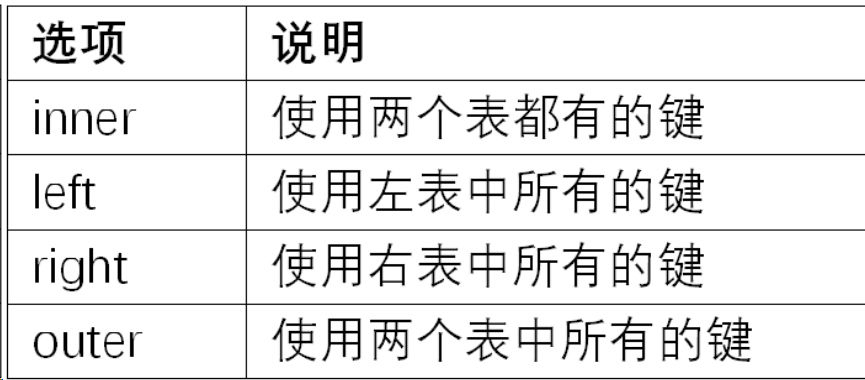

In [ ]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})

In [ ]:
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'], 'data2': range(5)})

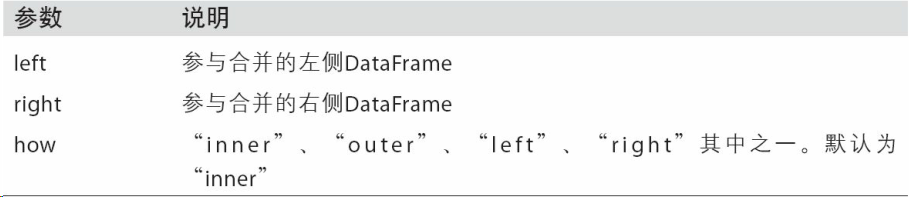

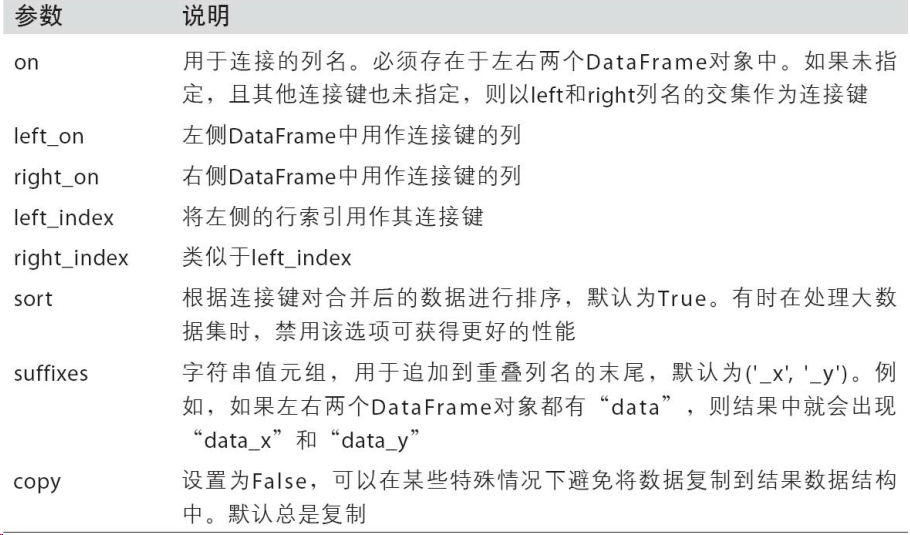